In [1]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
np.random.seed(42)
data_group_a = np.random.normal(5,1,100)
data_group_b = np.random.normal(5.1,1,100)

In [3]:
rope_lower, rope_upper= -0.1,0.1

In [4]:
def calculate_kde(samples):
    kde= gaussian_kde(samples)
    return kde

In [5]:
with pm.Model() as model:
    mean_a = pm.Normal('mean_a',mu=5,sd=1)
    mean_b = pm.Normal('mean_b',mu=5,sd=1.1)
    sd_a = pm.HalfNormal('sd_a',sd=1)
    sd_b = pm.HalfNormal('sd_b',sd=1)
    obs_a = pm.Normal('obs_a',mu = mean_a,sd=sd_a, observed=data_group_a)
    obs_b = pm.Normal('obs_b', mu=mean_b, sd= sd_b, observed = data_group_b)
    diff_means= pm.Deterministic('diff_means',mean_b-mean_a)

In [6]:
with model:
    trace = pm.sample(2000, tune=1000,cores=1)

c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\deprecat\classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [sd_b, sd_a, mean_b, mean_a]


Sampling 2 chains for 1_000 tune and 2_000 draw iterations (2_000 + 4_000 draws total) took 12 seconds.
c:\Users\ahmad\anaconda3\envs\pm3bap\lib\site-packages\arviz\utils.py:175: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


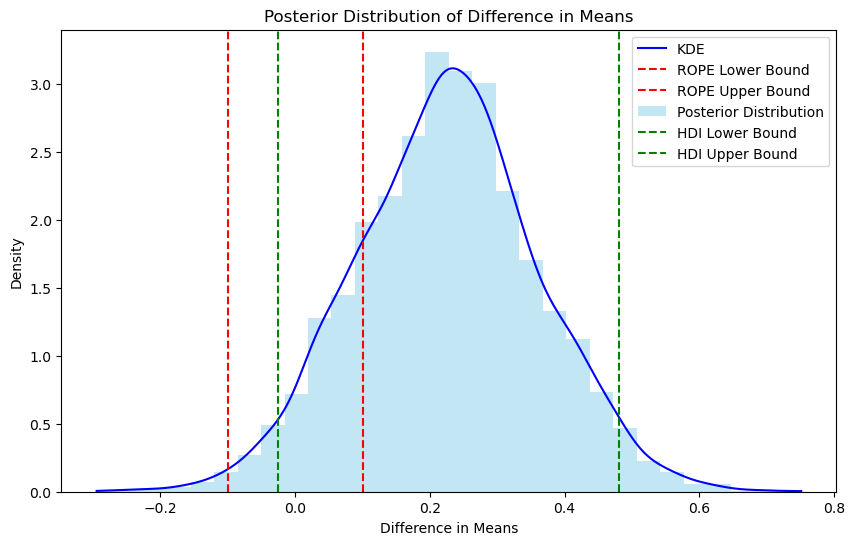

ROPE :  (-0.1, 0.1)
HDI :  [-0.02519604  0.48120052]


In [7]:
# Plot the posterior distribution of the difference in means with KDE
posterior_sample = trace['diff_means']
kde = calculate_kde(posterior_sample)

x_vals = np.linspace(min(posterior_sample), max(posterior_sample), 1000)

plt.figure(figsize=(10,6))

plt.plot(x_vals, kde(x_vals), color='blue', label='KDE')

plt.axvline(x=rope_lower, color='r', linestyle='--', label='ROPE Lower Bound')
plt.axvline(x=rope_upper, color='r', linestyle='--', label='ROPE Upper Bound')

plt.hist(posterior_sample,bins=30,density=True,alpha =0.5,color='skyblue',label='Posterior Distribution')

# Calculate and plot the Highest Density Interval (HDI)
hdi=az.hdi(posterior_sample)
plt.axvline(x=hdi[0], color='g', linestyle='--', label='HDI Lower Bound')
plt.axvline(x=hdi[1], color='g', linestyle='--', label='HDI Upper Bound')

plt.legend()
plt.xlabel('Difference in Means')
plt.ylabel('Density')
plt.title('Posterior Distribution of Difference in Means')
plt.show()
print("ROPE : ", (rope_lower, rope_upper))
print("HDI : ", hdi)